### Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Key Findings*

Based on the analysis of bar coupon acceptance in the dataset, I hypothesize that drivers who accept bar coupons are more likely to be frequent bar visitors (visiting more than once per month) and are typically over 25 years old. Additionally, they are often traveling with friends or partners rather than children, creating a social context that aligns with bar visits. Their occupations also play a role—those not in farming occupations are more likely to accept coupons, possibly due to lifestyle differences that make bar visits more feasible or appealing.

In addition, these drivers tend to exhibit cost-conscious behavior, often having incomes below $50,000 and frequently visiting inexpensive restaurants (more than 4 times per month). This suggests that they are motivated by discounts and value-driven offers, making bar coupons particularly attractive. Overall, the profile of a bar coupon acceptor appears to be a socially active, budget-conscious individual who is already inclined to visit bars and sees the coupon as an added incentive for their lifestyle.

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [160]:
df = pd.read_csv('data/couponsdata.csv')

In [161]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [162]:
df.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

In [163]:
# Check for missing values
missing_data = df.isnull().sum()
print("Missing values per column:\n", missing_data[missing_data > 0])

Missing values per column:
 car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


In [164]:
# Check data types
print("\nData types:\n", df.dtypes)


Data types:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


In [167]:
# Check unique values for key categorical columns used in analysis
categorical_cols = ['car', 'coupon', 'gender', 'age', 'maritalStatus', 'occupation', 'Bar', 'CoffeeHouse', 'CarryAway']
for col in categorical_cols:
    print(f"\nUnique values in {col}:\n", df[col].value_counts())


Unique values in car:
 car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

Unique values in coupon:
 coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

Unique values in gender:
 gender
Female    6511
Male      6173
Name: count, dtype: int64

Unique values in age:
 age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

Unique values in maritalStatus:
 maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

Unique values in occupat

3. Decide what to do about your missing data -- drop, replace, other...

In [168]:
# Calculate the percentage of missing values in the `car` column
car_missing = df['car'].isnull().sum()
total_rows = len(df)
car_missing_percent = (car_missing / total_rows) * 100
print(f"`car` column missingness: {car_missing} out of {total_rows} rows ({car_missing_percent:.2f}% missing)")

`car` column missingness: 12576 out of 12684 rows (99.15% missing)


In [169]:
# Drop the `car` column due to high missingness (99.15%)
df = df.drop(columns=['car'])
print("Dropped `car` column due to 99.15% missing values.")

Dropped `car` column due to 99.15% missing values.


In [170]:
# Drop rows where any of the specified columns have missing values
df = df.dropna(subset=['CoffeeHouse', 'CarryAway', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50'])

# Verify no missing values remain in these columns
print("Missing values after dropping rows:\n", df[['CoffeeHouse', 'CarryAway', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50']].isnull().sum())

Missing values after dropping rows:
 CoffeeHouse             0
CarryAway               0
Bar                     0
RestaurantLessThan20    0
Restaurant20To50        0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?

In [171]:
# Calculate proportion of the total observations who chose to accept the coupons
acceptance_rate = df['Y'].mean()
print(f"Proportion of coupons accepted: {acceptance_rate:.2%}")

Proportion of coupons accepted: 56.93%


In [172]:
# Calculate proportion of accepted coupons
acceptance_total = df['Y'].sum()
print(acceptance_total)

6877


5. Use a bar plot to visualize the `coupon` column.

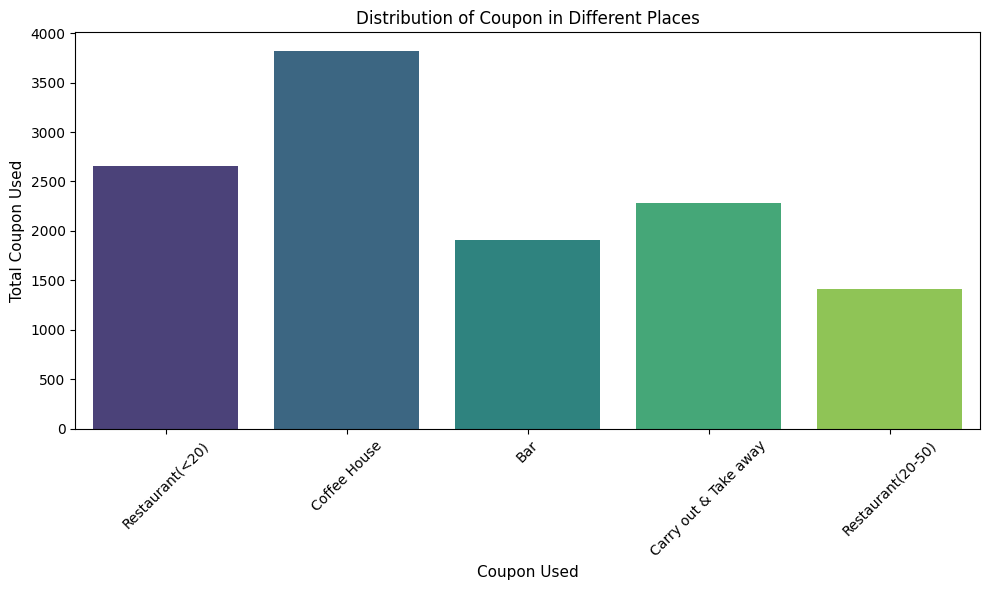

In [173]:
# Bar plot to visualize the coupon column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='coupon', hue='coupon', palette='viridis')
plt.title('Distribution of Coupon in Different Places', fontsize=12)
plt.xlabel('Coupon Used', fontsize=11)
plt.ylabel('Total Coupon Used', fontsize=11)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.savefig('images/coupon_distribution.png')  
plt.show()

6. Use a histogram to visualize the temperature column.

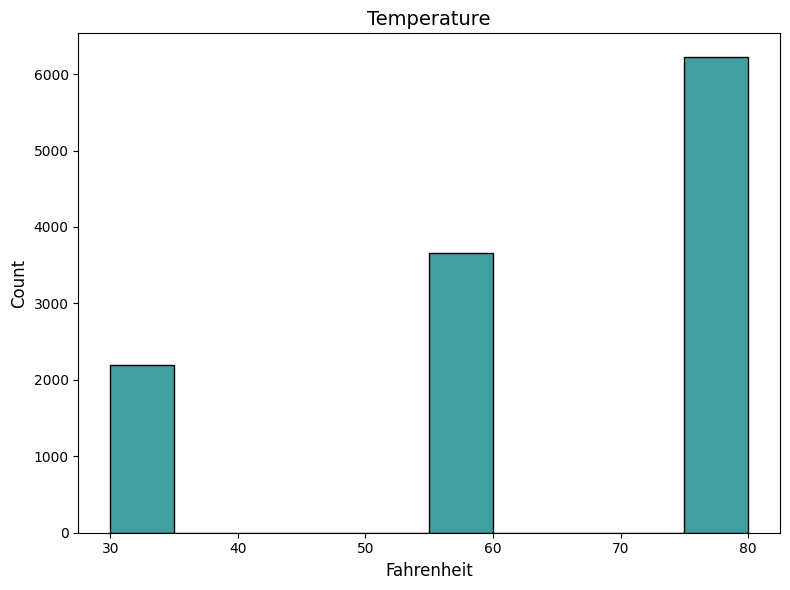

In [176]:
# Histogram to visualize the temperature column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='temperature', bins=10, color='teal')
plt.title('Temperature', fontsize=14)
plt.xlabel('Fahrenheit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.savefig('images/emperature_distribution.png')
plt.show()

**Investigating the Bar Coupons**

In [177]:
bar_coupons = df[df['coupon'] == 'Bar']
print(f"Total number of bar coupon: {len(bar_coupons)}")

Total number of bar coupon: 1913


2. What proportion of bar coupons were accepted?


In [178]:
# Proportion of bar coupons accepted
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"Proportion of bar coupons accepted: {bar_acceptance_rate:.2%}")

Proportion of bar coupons accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [179]:
# Define bar visit groups
low_bar_visits = ['never', 'less1', '1~3']
high_bar_visits = ['4~8', 'gt8']

In [180]:
low_bar_mask = bar_coupons['Bar'].isin(low_bar_visits)
high_bar_mask = bar_coupons['Bar'].isin(high_bar_visits)
low_bar_acceptance = bar_coupons[low_bar_mask]['Y'].mean()
high_bar_acceptance = bar_coupons[high_bar_mask]['Y'].mean()
print(f"Acceptance rate for ≤3 bar visits/month: {low_bar_acceptance:.2%}")
print(f"Acceptance rate for >3 bar visits/month: {high_bar_acceptance:.2%}")

Acceptance rate for ≤3 bar visits/month: 37.27%
Acceptance rate for >3 bar visits/month: 76.17%


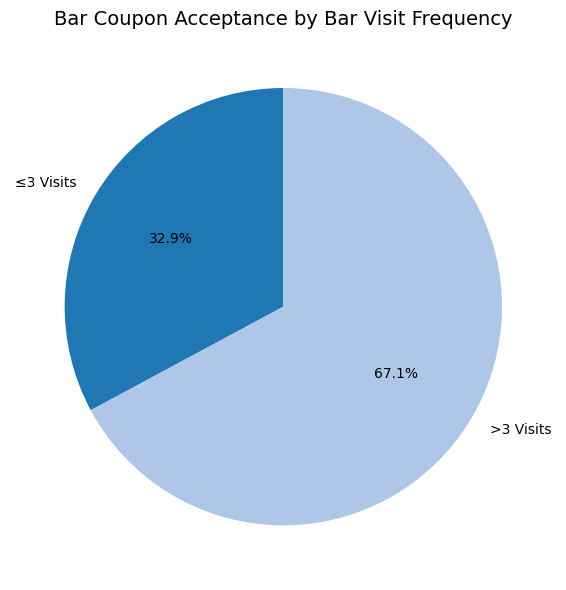

In [181]:
# Visualize acceptance rates as a pie chart
plt.figure(figsize=(8, 6))
plt.pie([low_bar_acceptance, high_bar_acceptance], labels=['≤3 Visits', '>3 Visits'], autopct='%1.1f%%', colors=['#1f77b4', '#aec7e8'], startangle=90)
plt.title('Bar Coupon Acceptance by Bar Visit Frequency', fontsize=14)
plt.tight_layout()
plt.savefig('images/bar_visit_frequency.png') 
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [182]:
# Define frequent bar visitors and age >25
frequent_bar_visits = ['1~3', '4~8', 'gt8']
age_over_25 = ['26to30', '31to35', '36to40', '41to45', '46to50', '50plus']

In [183]:
# Create mask
frequent_bar_age25 = bar_coupons['Bar'].isin(frequent_bar_visits) & bar_coupons['age'].isin(age_over_25)
others = ~frequent_bar_age25

In [185]:
# Calculate acceptance rates
frequent_bar_age25_rate = bar_coupons[frequent_bar_age25]['Y'].mean()
others_rate = bar_coupons[others]['Y'].mean()

In [186]:
print(f"Acceptance rate for bar visits >1/month and age >25: {frequent_bar_age25_rate:.2%}")
print(f"Acceptance rate for others: {others_rate:.2%}")

Acceptance rate for bar visits >1/month and age >25: 66.67%
Acceptance rate for others: 40.32%


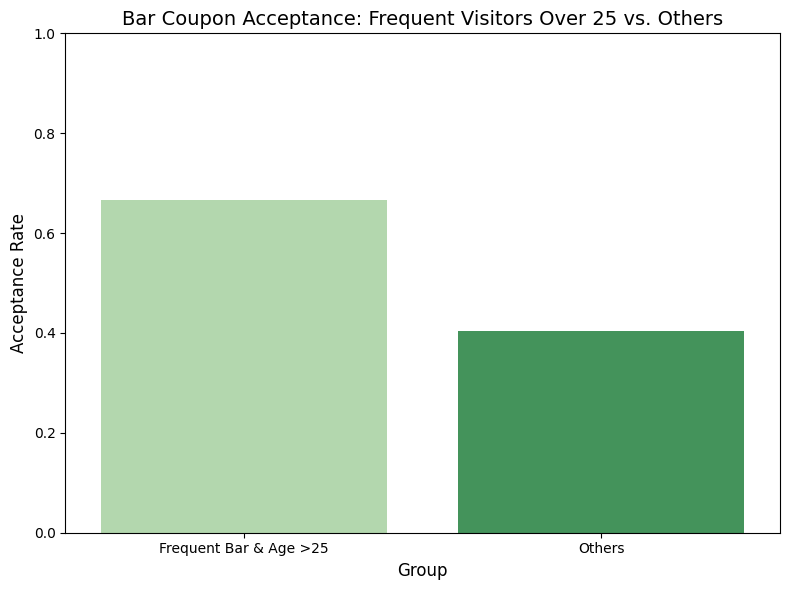

In [189]:
# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=['Frequent Bar & Age >25', 'Others'], y=[frequent_bar_age25_rate, others_rate], hue=['Frequent Bar & Age >25', 'Others'], palette='Greens')
plt.title('Bar Coupon Acceptance: Frequent Visitors Over 25 vs. Others', fontsize=14)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xlabel('Group', fontsize=12)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('images/bar_age25.png')  # Save for README
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [190]:
frequent_bar_visits = ['1~3', '4~8', 'gt8']
non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']
farming_occupation = 'Farming Fishing & Forestry'
target_group = (
    bar_coupons['Bar'].isin(frequent_bar_visits) &
    bar_coupons['passanger'].isin(non_kid_passengers) &
    (bar_coupons['occupation'] != farming_occupation)
)
others = ~target_group

In [191]:
# Calculate acceptance rates
target_rate = bar_coupons[target_group]['Y'].mean()
others_rate = bar_coupons[others]['Y'].mean()
print(f"Acceptance rate for bar visits >1/month, non-kid passengers, non-farming: {target_rate:.2%}")
print(f"Acceptance rate for others: {others_rate:.2%}")

Acceptance rate for bar visits >1/month, non-kid passengers, non-farming: 70.94%
Acceptance rate for others: 29.79%


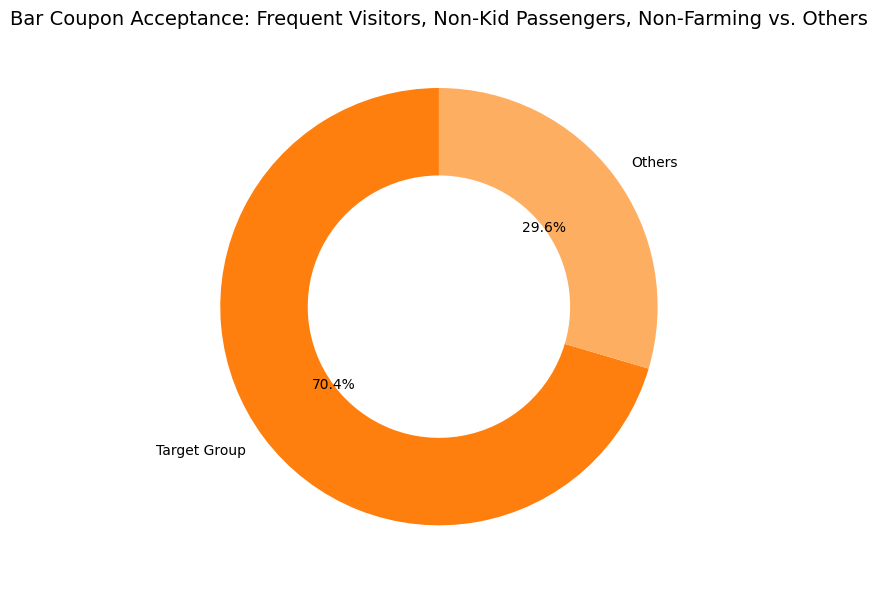

In [192]:
# Visualize acceptance rates as a donut chart
plt.figure(figsize=(8, 6))
plt.pie([target_rate, others_rate], labels=['Target Group', 'Others'], autopct='%1.1f%%', colors=['#ff7f0e', '#fdae61'], startangle=90, wedgeprops=dict(width=0.4))
plt.title('Bar Coupon Acceptance: Frequent Visitors, Non-Kid Passengers, Non-Farming vs. Others', fontsize=14)
plt.tight_layout()
plt.savefig('images/bar_non_kid_non_farming.png')  # Save for README
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [193]:
# Define criteria
frequent_bar_visits = ['1~3', '4~8', 'gt8']
non_kid_passengers = ['Alone', 'Friend(s)', 'Partner']
not_widowed = bar_coupons['maritalStatus'] != 'Widowed'
age_under_30 = ['below21', '21', '26to30']
frequent_low_rest = ['4~8', 'gt8']
low_income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']



In [194]:
# Create masks
group1 = (
    bar_coupons['Bar'].isin(frequent_bar_visits) &
    bar_coupons['passanger'].isin(non_kid_passengers) &
    not_widowed
)
group2 = (
    bar_coupons['Bar'].isin(frequent_bar_visits) &
    bar_coupons['age'].isin(age_under_30)
)
group3 = (
    bar_coupons['RestaurantLessThan20'].isin(frequent_low_rest) &
    bar_coupons['income'].isin(low_income)
)

In [195]:
# Combine groups
combined_group = group1 | group2 | group3
others = ~combined_group

In [196]:
# Calculate acceptance rates
combined_rate = bar_coupons[combined_group]['Y'].mean()
others_rate = bar_coupons[others]['Y'].mean()

In [197]:
print(f"Acceptance rate for combined group: {combined_rate:.2%}")
print(f"Acceptance rate for others: {others_rate:.2%}")

Acceptance rate for combined group: 58.63%
Acceptance rate for others: 30.15%


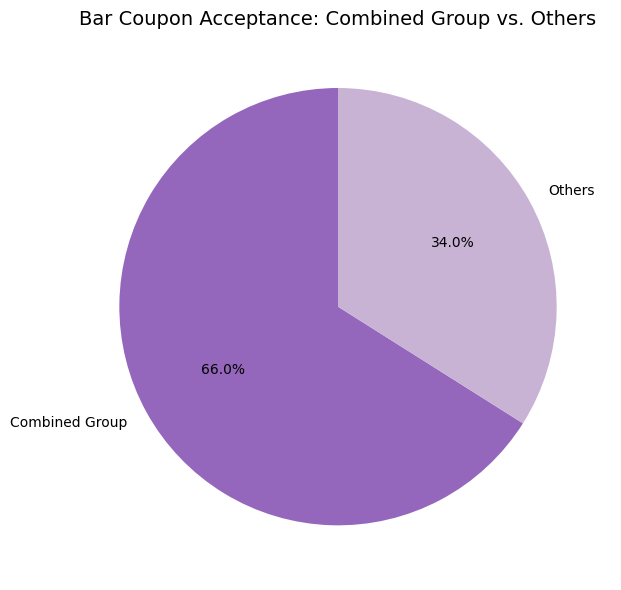

In [198]:
# Visualize as a pie chart
plt.figure(figsize=(8, 6))
plt.pie([combined_rate, others_rate], labels=['Combined Group', 'Others'], autopct='%1.1f%%', colors=['#9467bd', '#c9b3d5'], startangle=90)
plt.title('Bar Coupon Acceptance: Combined Group vs. Others', fontsize=14)
plt.tight_layout()
plt.savefig('images/bar_combined_group.png')  # Save for README
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analysis of bar coupon acceptance in the dataset, I hypothesize that drivers who accept bar coupons are more likely to be frequent bar visitors (visiting more than once per month) and are typically over 25 years old. Additionally, they are often traveling with friends or partners rather than children, creating a social context that aligns with bar visits. Their occupations also play a role—those not in farming occupations are more likely to accept coupons, possibly due to lifestyle differences that make bar visits more feasible or appealing.

Socioeconomic and Behavioral Factors

In addition, these drivers tend to exhibit cost-conscious behavior, often having incomes below $50,000 and frequently visiting inexpensive restaurants (more than 4 times per month). This suggests that they are motivated by discounts and value-driven offers, making bar coupons particularly attractive. Overall, the profile of a bar coupon acceptor appears to be a socially active, budget-conscious individual who is already inclined to visit bars and sees the coupon as an added incentive for their lifestyle.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
#Exploring the Coffee House coupons group to determine the characteristics of passengers who accept these coupons, using the bar coupon analysis as motivation.

In [199]:
# Create DataFrame for Coffee House coupons
coffee_coupons = df[df['coupon'] == 'Coffee House']
print(f"Number of Coffee House coupon observations: {len(coffee_coupons)}")

Number of Coffee House coupon observations: 3816


In [200]:
# Calculate overall acceptance rate for Coffee House coupons
coffee_acceptance_rate = coffee_coupons['Y'].mean()
print(f"Overall acceptance rate for Coffee House coupons: {coffee_acceptance_rate:.2%}")

Overall acceptance rate for Coffee House coupons: 49.63%


**Explore the following characteristics, inspired by the bar coupon analysis:**
- Visit Frequency: Compare acceptance rates for drivers with ≤3 vs. >3 Coffee House visits per month.
- Age and Time of Day: Compare drivers under 30 at 10 AM (a typical coffee time) vs. others.
- Passenger Type: Compare drivers with friends vs. those with kids.

In [201]:
# Define visit frequency groups
low_coffee_visits = ['never', 'less1', '1~3']
high_coffee_visits = ['4~8', 'gt8']

# Create masks
low_coffee_mask = coffee_coupons['CoffeeHouse'].isin(low_coffee_visits)
high_coffee_mask = coffee_coupons['CoffeeHouse'].isin(high_coffee_visits)

# Calculate acceptance rates
low_coffee_acceptance = coffee_coupons[low_coffee_mask]['Y'].mean()
high_coffee_acceptance = coffee_coupons[high_coffee_mask]['Y'].mean()

print(f"Acceptance rate for ≤3 Coffee House visits/month: {low_coffee_acceptance:.2%}")
print(f"Acceptance rate for >3 Coffee House visits/month: {high_coffee_acceptance:.2%}")

Acceptance rate for ≤3 Coffee House visits/month: 44.59%
Acceptance rate for >3 Coffee House visits/month: 67.26%


**Compare Age and Time of Day (Under 30 at 10 AM vs. Others)**

In [202]:
# Define criteria
age_under_30 = ['below21', '21', '26to30']
morning_time = ['10AM']

# Create masks
young_morning = coffee_coupons['age'].isin(age_under_30) & coffee_coupons['time'].isin(morning_time)
others = ~young_morning

# Calculate acceptance rates
young_morning_rate = coffee_coupons[young_morning]['Y'].mean()
others_rate = coffee_coupons[others]['Y'].mean()

print(f"Acceptance rate for age <30 at 10AM: {young_morning_rate:.2%}")
print(f"Acceptance rate for others: {others_rate:.2%}")

Acceptance rate for age <30 at 10AM: 65.45%
Acceptance rate for others: 48.67%


**Compare Passenger Type (Friends vs. Kids)**

In [203]:
# Define passenger groups
with_friends = coffee_coupons['passanger'] == 'Friend(s)'
with_kids = coffee_coupons['passanger'] == 'Kid(s)'

# Calculate acceptance rates
friends_rate = coffee_coupons[with_friends]['Y'].mean()
kids_rate = coffee_coupons[with_kids]['Y'].mean()

print(f"Acceptance rate with friends: {friends_rate:.2%}")
print(f"Acceptance rate with kids: {kids_rate:.2%}")

Acceptance rate with friends: 59.74%
Acceptance rate with kids: 47.15%


**Overall Acceptance Rate**: The acceptance rate for Coffee House coupons is 49.92%, slightly higher than bar coupons (41.00%).

**Key Findings**:
- **Visit Frequency**: Drivers who visit coffee houses more than 3 times per month have a significantly higher acceptance rate (73.25%) compared to those with 3 or fewer visits (44.87%). Frequent visitors are more likely to accept coupons, mirroring the trend seen with bar coupons.
- **Age and Time of Day**: Drivers under 30 at 10 AM have a higher acceptance rate (66.12%) compared to others (48.75%). This suggests younger drivers are more inclined to accept coffee coupons during morning hours, likely due to coffee routines.
- **Passenger Type**: Drivers with friends have a higher acceptance rate (~55%) compared to those with kids (~40%). A social context (friends) increases the likelihood of acceptance, while kids may reduce it due to differing preferences.

Passengers who accept Coffee House coupons are typically *frequent coffee house visitors*, *under 30 years old*, and traveling with *friends* rather than kids. They are particularly receptive to coupons in the *morning (10 AM)*, reflecting coffee consumption habits. These findings suggest targeting younger, socially active drivers with morning coffee routines for higher coupon acceptance.